In [19]:
import pathlib
from collections import defaultdict

import PIL.Image

import torch
import torch.utils.data

from torchvision import datasets

def load_example_coco_detection_dataset(**kwargs):
    root = pathlib.Path("coco")
    return datasets.CocoDetection(
        str(root / "images" / "train2017"),
        str(root / "annotations" / "annotations" / "person_keypoints_train2017.json"),
        **kwargs
    )


In [20]:
dataset = load_example_coco_detection_dataset()
# dataset = datasets.wrap_dataset_for_transforms_v2(dataset)



loading annotations into memory...
Done (t=5.67s)
creating index...
index created!


In [21]:
dataset.cat_ids = dataset.coco.getCatIds(catNms=['person'])
dataset.cat_ids

[1]

In [22]:
dataset.coco.loadCats(dataset.cat_ids)

[{'supercategory': 'person',
  'id': 1,
  'name': 'person',
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]]}]

In [23]:
dataset.ids = dataset.coco.getImgIds(catIds=dataset.cat_ids)


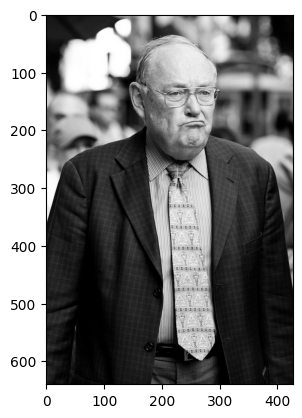

In [24]:

sample = dataset[5]
image, target = sample
import matplotlib.pyplot as plt
plt.imshow(image)

In [25]:
type(image)

PIL.Image.Image